In [1]:
library(ggplot2)
library(car)

Loading required package: carData



In [2]:
# Function to read Data
read_data <- function(file_path) {
  d <- read.table(file_path, header = TRUE, dec = ".",  row.names = 1) 
  return(d)
}

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


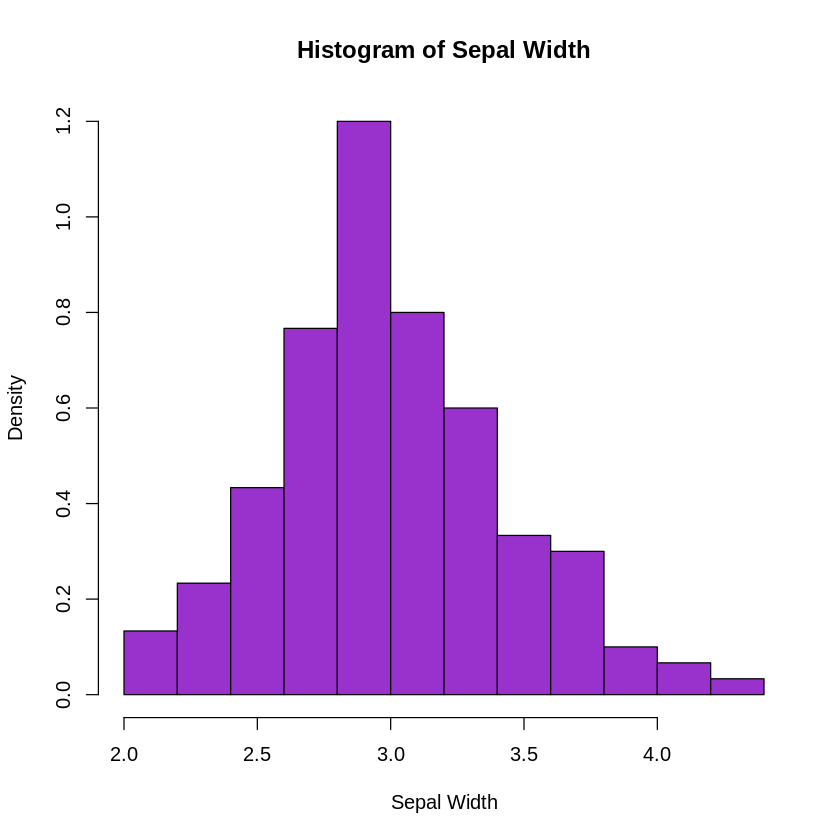

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
14,4.3,3.0,1.1,0.1,setosa
9,4.4,2.9,1.4,0.2,setosa
39,4.4,3.0,1.3,0.2,setosa
43,4.4,3.2,1.3,0.2,setosa
42,4.5,2.3,1.3,0.3,setosa
4,4.6,3.1,1.5,0.2,setosa


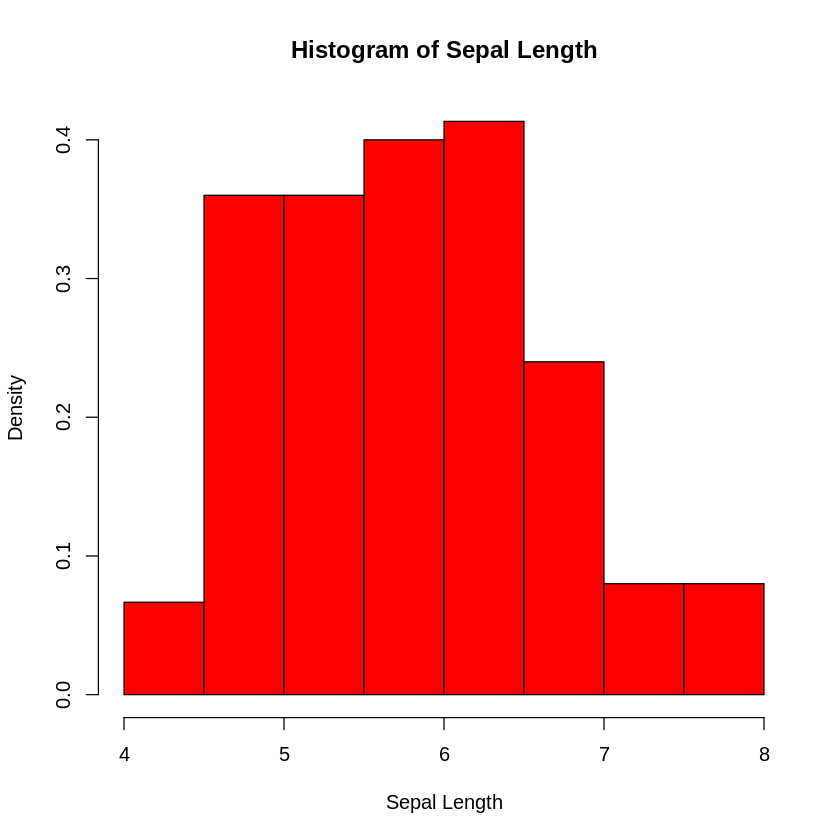

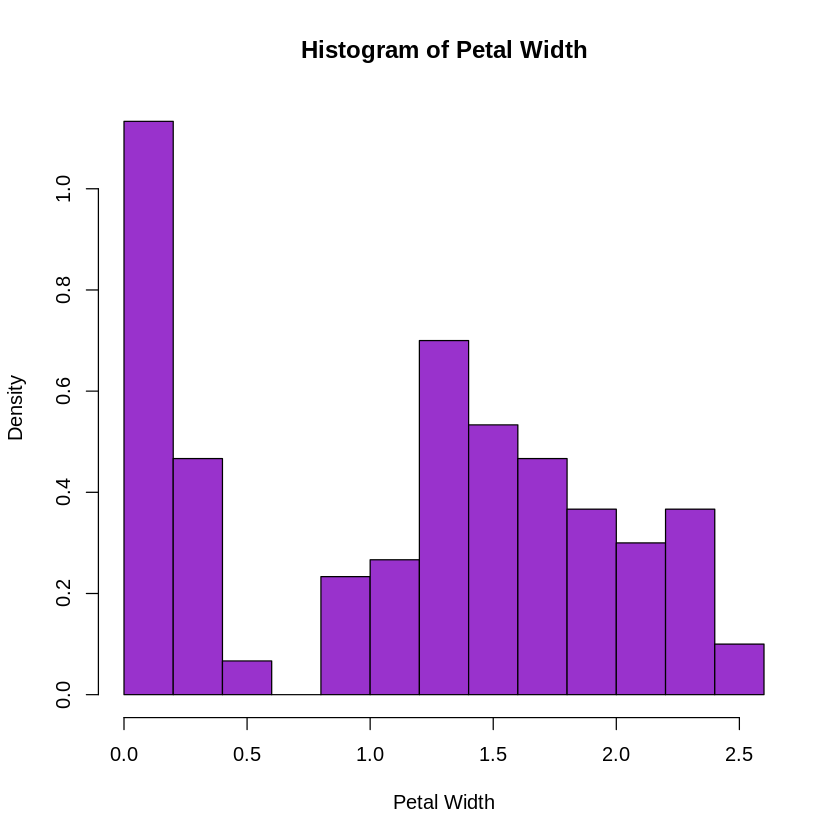

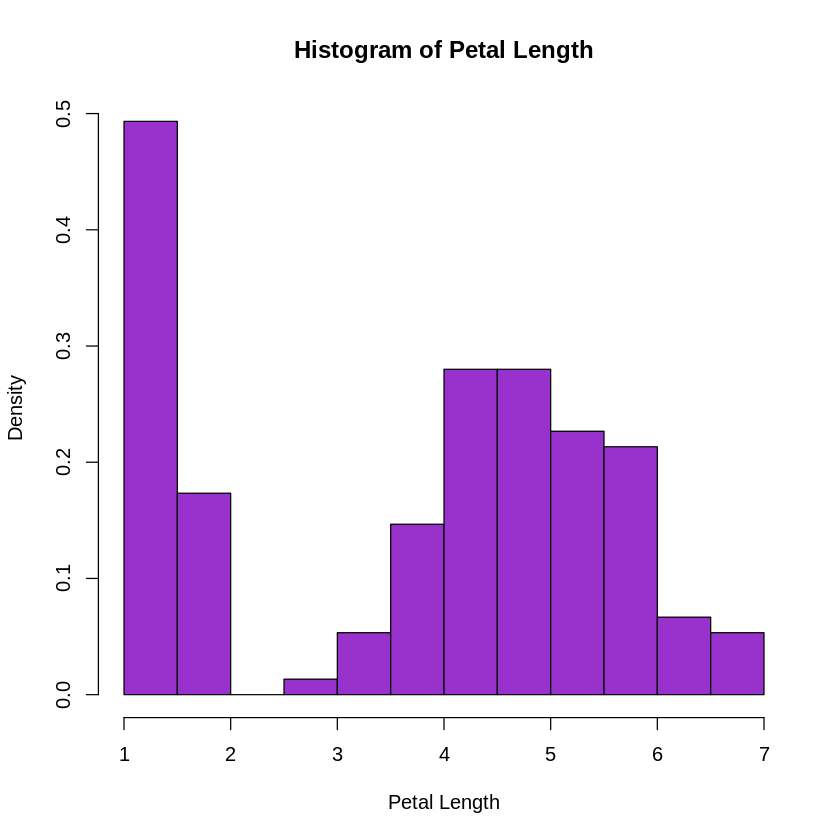

In [3]:
#5.A
data(iris)
head(iris)
iris_order_by_sepal_width<-iris[order(iris$Sepal.Width),]
hist(iris_order_by_sepal_width$Sepal.Width, main="Histogram of Sepal Width",
     xlab="Sepal Width", col="darkorchid", freq=FALSE)

iris_order_by_sepal_length<-iris[order(iris$Sepal.Length),]
hist(iris_order_by_sepal_length$Sepal.Length, main="Histogram of Sepal Length",
     xlab="Sepal Length",  col="red", freq=FALSE)
head(iris_order_by_sepal_length)
iris_order_by_petal_width<-iris[order(iris$Petal.Width),]
hist(iris_order_by_petal_width$Petal.Width, main="Histogram of Petal Width",
     xlab="Petal Width",  col="darkorchid", freq=FALSE)

iris_order_by_petal_length<-iris[order(iris$Petal.Length),]
hist(iris_order_by_petal_length$Petal.Length, main="Histogram of Petal Length",
     xlab="Petal Length", col="darkorchid", freq=FALSE)

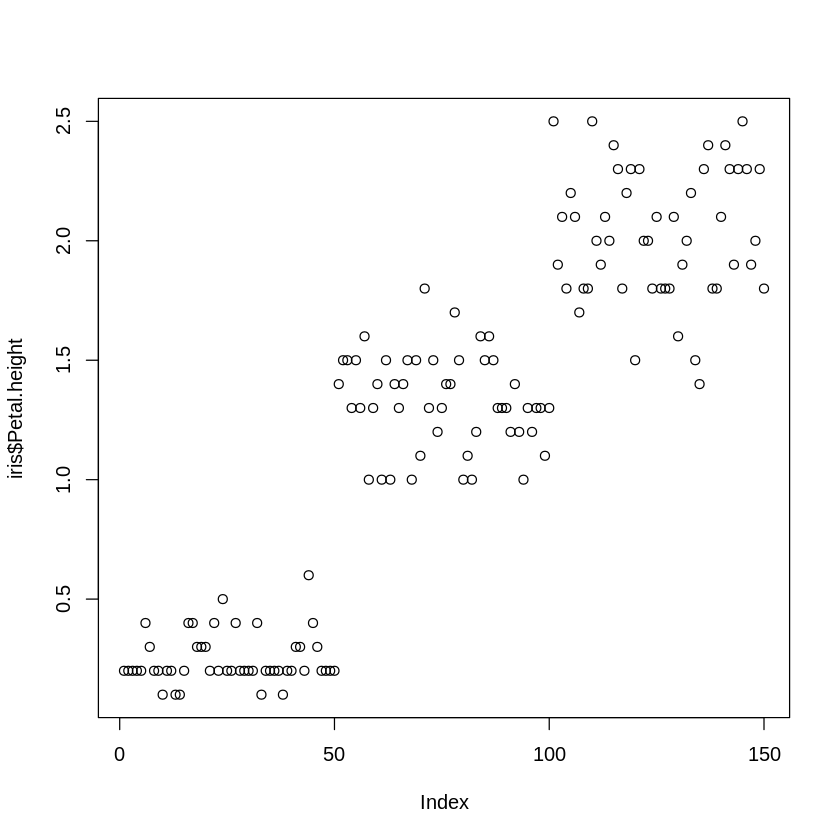

In [4]:
plot(iris$Petal.Width, iris$Petal.height)

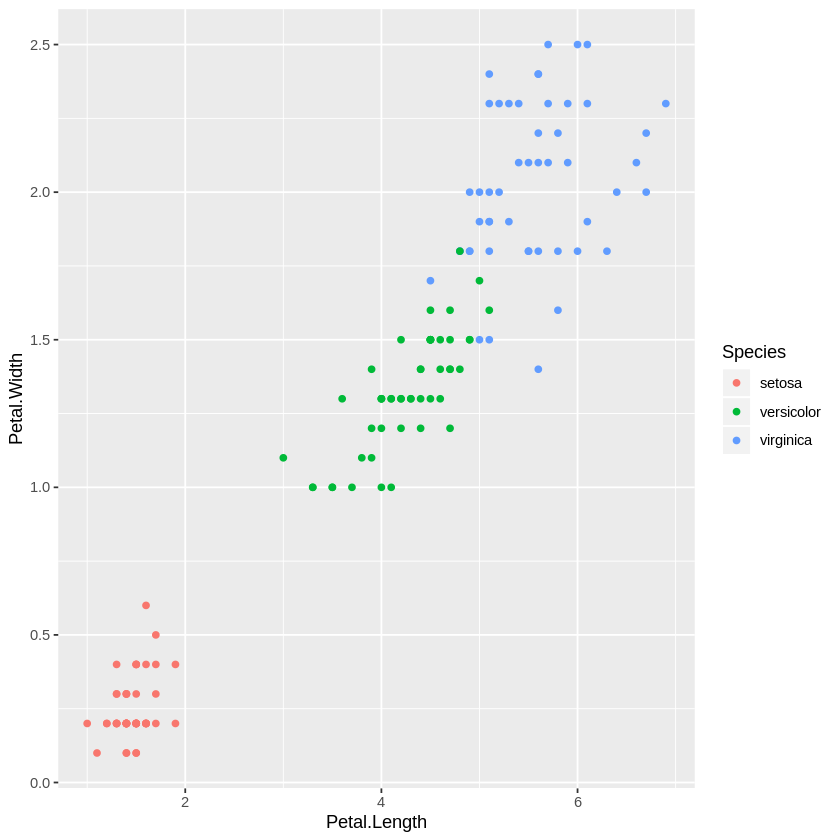

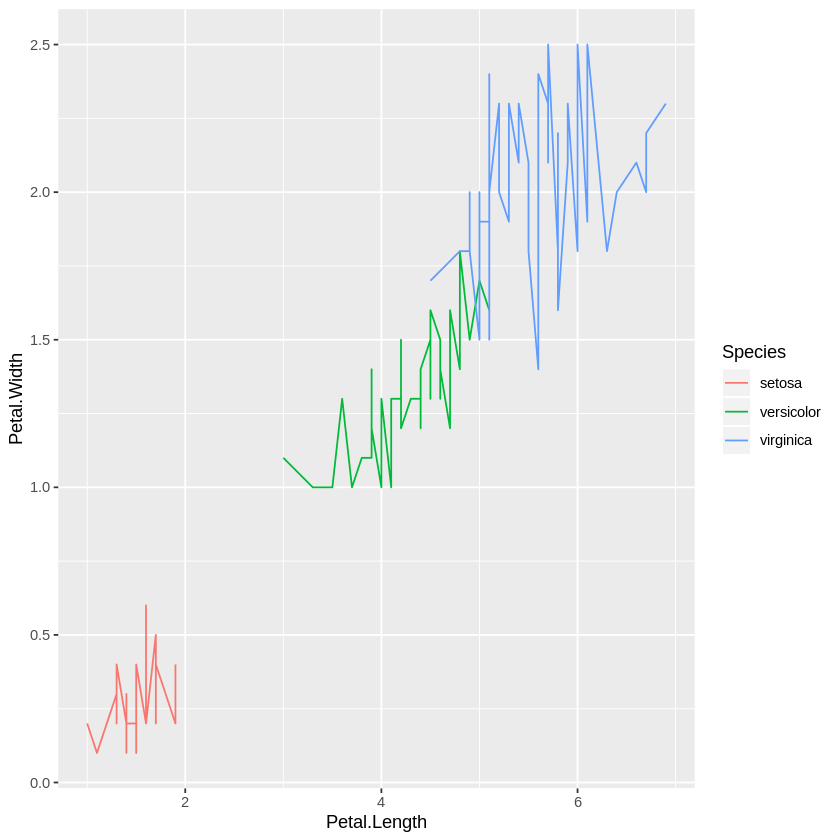

In [5]:
#5.A 
# I
ggplot(iris_order_by_sepal_width, aes(x=Petal.Length, y= Petal.Width,fill=Species, color=Species)) +
#   geom_histogram(position="identity", alpha=0.5) +
geom_point(position="identity")

# ggplot(iris, aes(x=Sepal.Length,fill=Species, color=Species)) + 
# geom_point(position="identity", color="blue", alpha=.5)

#   geom_histogram(position="identity", alpha=0.5)
ggplot(iris_order_by_sepal_width, aes(x=Petal.Length, y= Petal.Width,fill=Species, color=Species)) +
geom_line()

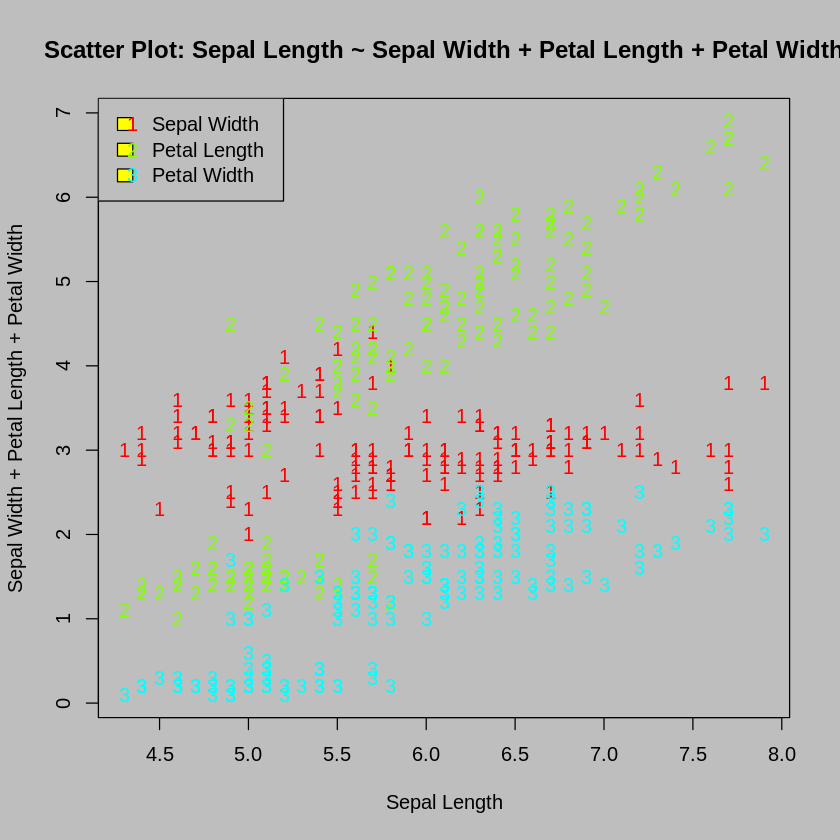

In [42]:
#  II
op <- par(bg = "grey")
matplot(iris$Sepal.Length, iris[,-c(1,5)], pch = "123",xlab = "Sepal Length",
        ylab = "Sepal Width + Petal Length + Petal Width",col= rainbow(4),
       main = "Scatter Plot: Sepal Length ~ Sepal Width + Petal Length + Petal Width")
legend("topleft",1, 95, legend =c("Sepal Width", "Petal Length","Petal Width"),pch = "123",
        col = rainbow(4))
par(op)

In [16]:
#5.B
babies_file_path<- './babies.data.txt'
babies_data <- read.table(babies_file_path, header = TRUE,  sep = " ", dec = ".") 
head(babies_data)

,birth.weight,gestation,not.first.born,mom.age,mom.height,mom.weight,mom.smokes
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,120,284,0,27,62,100,0
2,113,282,0,33,64,135,0
3,128,279,0,28,64,115,1
4,108,282,0,23,67,125,1
5,136,286,0,25,62,93,0
6,138,244,0,33,62,178,0


Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”


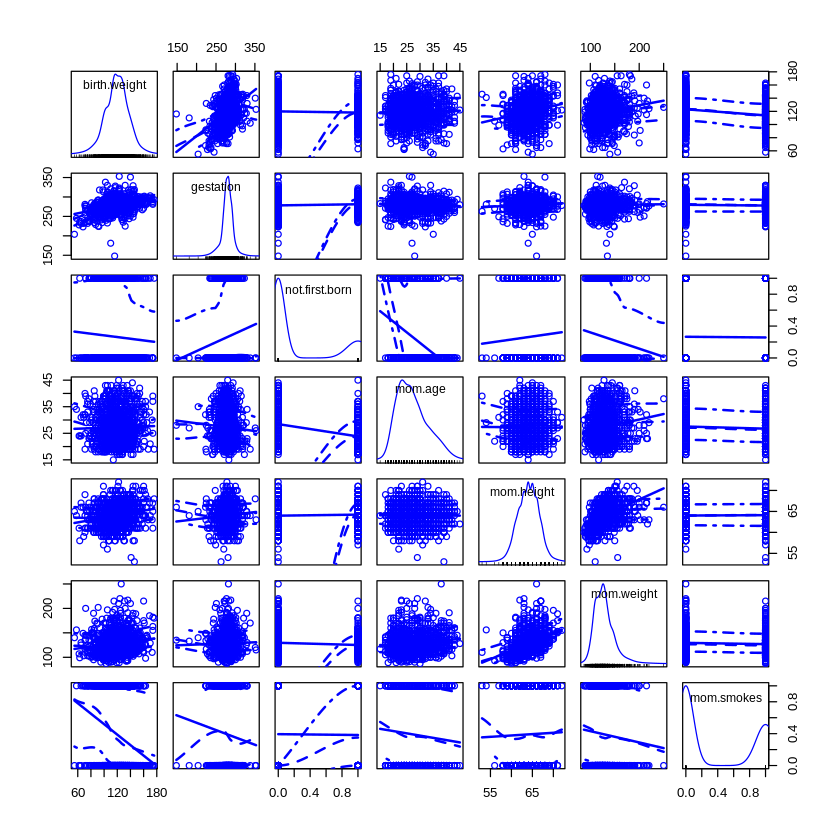

In [34]:
# scatterplotMatrix()
scatterplotMatrix(formula = ~birth.weight+gestation+not.first.born+mom.age+mom.height+mom.weight+mom.smokes,
                 data = babies_data)

In [28]:
input <- babies_data[,c("gestation", "not.first.born", "mom.age", "mom.height", "mom.weight", "mom.smokes")]
birth.weight <- babies_data[,c("birth.weight")]
model = lm(birth.weight~gestation+not.first.born+mom.age+mom.height+mom.weight+mom.smokes, data = input)
# Show the model.
summary(model)

a <- coef(model)
print('Παράμετροι')
print(a)



Call:
lm(formula = birth.weight ~ gestation + not.first.born + mom.age + 
    mom.height + mom.weight + mom.smokes, data = input)

Residuals:
    Min      1Q  Median      3Q     Max 
-57.613 -10.189  -0.135   9.683  51.713 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -80.41085   14.34657  -5.605 2.60e-08 ***
gestation        0.44398    0.02910  15.258  < 2e-16 ***
not.first.born  -3.32720    1.12895  -2.947  0.00327 ** 
mom.age         -0.00895    0.08582  -0.104  0.91696    
mom.height       1.15402    0.20502   5.629 2.27e-08 ***
mom.weight       0.05017    0.02524   1.987  0.04711 *  
mom.smokes      -8.40073    0.95382  -8.807  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.83 on 1167 degrees of freedom
Multiple R-squared:  0.258,	Adjusted R-squared:  0.2541 
F-statistic: 67.61 on 6 and 1167 DF,  p-value: < 2.2e-16


[1] "Παράμετροι"
   (Intercept)      gestation not.first.born        mom.age     mom.height 
 -80.410853396    0.443978339   -3.327199613   -0.008950305    1.154020364 
    mom.weight     mom.smokes 
   0.050165027   -8.400733484 


birth.weight,1.00000000
gestation,0.40754279
not.first.born,-0.04390817
mom.age,0.02698291
mom.height,0.20370418
mom.weight,0.15592327
mom.smokes,-0.24679951


[1] "O gestation είναι ο βασικός παράγοντας που επιδρά στο birth.weight"


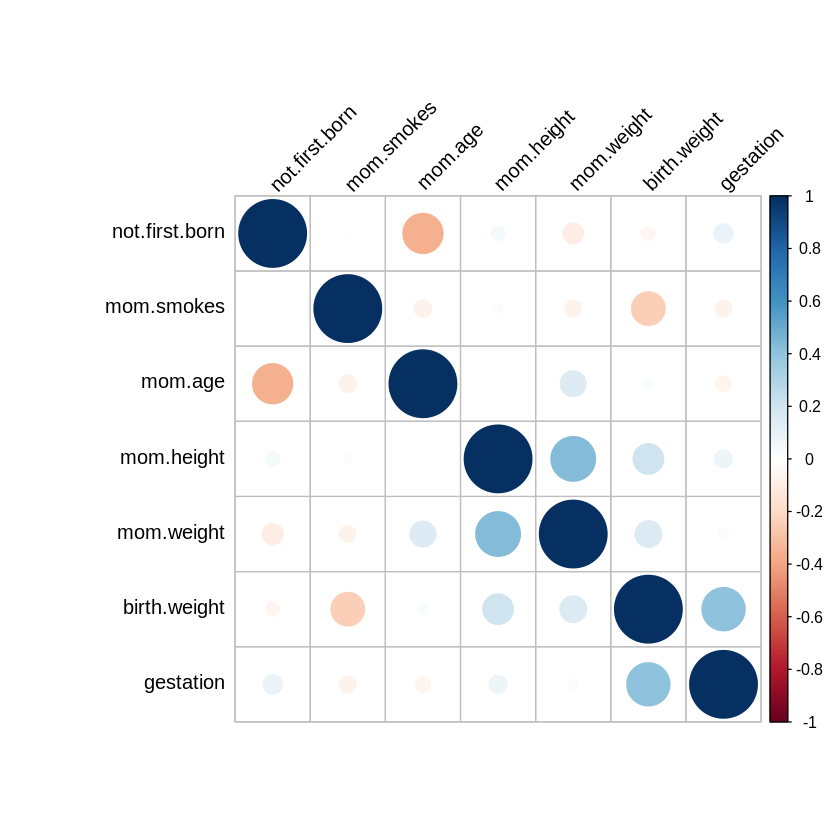

In [26]:
library(corrplot)
cor(babies_data, birth.weight)
res <-cor(babies_data)
corrplot(res, order = "hclust", 
         tl.col = "black", tl.srt = 45)
print('O gestation είναι ο βασικός παράγοντας που επιδρά στο birth.weight')